In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl/matches.csv
/kaggle/input/ipl/deliveries.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
matches_df = pd.read_csv("/kaggle/input/ipl/matches.csv") 
score_df =  pd.read_csv("/kaggle/input/ipl/deliveries.csv")

In [4]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


DATA INFORMATION 

In [6]:
print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [7]:
matches_df["umpire3"].tail()

631   NaN
632   NaN
633   NaN
634   NaN
635   NaN
Name: umpire3, dtype: float64

In [8]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [9]:
# matches we have got in the dataset
matches_df['id'].max()

636

In [10]:
#Seasons we have got in the dataset
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [11]:
matches_df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [12]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [13]:
matches_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

In [14]:
matches_df['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

In [15]:
matches_df['team1'].value_counts()

Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [16]:
matches_df['team2'].value_counts()

Delhi Daredevils               84
Royal Challengers Bangalore    82
Kolkata Knight Riders          80
Mumbai Indians                 75
Kings XI Punjab                71
Rajasthan Royals               64
Chennai Super Kings            54
Deccan Chargers                32
Sunrisers Hyderabad            30
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

In [17]:
matches_df['season'].value_counts().unique()

array([76, 74, 73, 60, 59, 58, 57])

In [18]:
matches_df['team1'].value_counts().unique()

array([82, 77, 70, 68, 63, 54, 46, 43, 20, 14,  8,  7])

In [19]:
matches_df['team2'].value_counts().unique()

array([84, 82, 80, 75, 71, 64, 54, 32, 30, 26, 16,  8,  7])

In [20]:
matches_df['season'].value_counts('team1').unique(),

(array([0.11949686, 0.1163522 , 0.11477987, 0.09433962, 0.0927673 ,
        0.09119497, 0.08962264]),)

In [21]:
matches_df['season'].value_counts('team2').unique()

array([0.11949686, 0.1163522 , 0.11477987, 0.09433962, 0.0927673 ,
       0.09119497, 0.08962264])

In [22]:
matches_df['season'].unique,['team1','value_counts']

(<bound method Series.unique of 0      2017
 1      2017
 2      2017
 3      2017
 4      2017
        ... 
 631    2016
 632    2016
 633    2016
 634    2016
 635    2016
 Name: season, Length: 636, dtype: int64>,
 ['team1', 'value_counts'])

In [23]:
matches_df['team1'].unique,['season','value_counts']

(<bound method Series.unique of 0              Sunrisers Hyderabad
 1                   Mumbai Indians
 2                    Gujarat Lions
 3           Rising Pune Supergiant
 4      Royal Challengers Bangalore
                   ...             
 631               Delhi Daredevils
 632                  Gujarat Lions
 633            Sunrisers Hyderabad
 634                  Gujarat Lions
 635            Sunrisers Hyderabad
 Name: team1, Length: 636, dtype: object>,
 ['season', 'value_counts'])

In [24]:
matches_df['team2'].unique,['season','value_counts']

(<bound method Series.unique of 0      Royal Challengers Bangalore
 1           Rising Pune Supergiant
 2            Kolkata Knight Riders
 3                  Kings XI Punjab
 4                 Delhi Daredevils
                   ...             
 631    Royal Challengers Bangalore
 632    Royal Challengers Bangalore
 633          Kolkata Knight Riders
 634            Sunrisers Hyderabad
 635    Royal Challengers Bangalore
 Name: team2, Length: 636, dtype: object>,
 ['season', 'value_counts'])

In [25]:
  sgps = matches_df.groupby('season')

In [26]:
sgps.team1.nunique()

season
2008     8
2009     8
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
Name: team1, dtype: int64

In [27]:
df_2011= sgps.get_group(2011)
df_2011.team1.unique()

array(['Chennai Super Kings', 'Deccan Chargers', 'Kochi Tuskers Kerala',
       'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Mumbai Indians', 'Pune Warriors'], dtype=object)

In [28]:
df_2017 = sgps.get_group(2017)
df_2017.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab'],
      dtype=object)

In [29]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [30]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [31]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [32]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [33]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['player_of_match']

'LMP Simmons'

In [34]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['player_of_match']

'CA Lynn'

In [35]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [36]:
matches_df.iloc[matches_df[matches_df['season'].ge(2008)].win_by_runs.idxmin()]['player_of_match']

'SPD Smith'

In [37]:
matches_df.iloc[matches_df['season'].idxmax()]['player_of_match']

'Yuvraj Singh'

In [38]:
sgps.player_of_match.value_counts()

season  player_of_match  
2008    SE Marsh             5
        SR Watson            4
        YK Pathan            4
        AC Gilchrist         2
        M Ntini              2
                            ..
2017    SS Iyer              1
        SV Samson            1
        WP Saha              1
        Washington Sundar    1
        Yuvraj Singh         1
Name: player_of_match, Length: 435, dtype: int64

In [39]:
sgps.winner.value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 84, dtype: int64

In [40]:
sgps.win_by_runs.value_counts()

season  win_by_runs
2008    0              34
        3               2
        6               2
        10              2
        23              2
                       ..
2017    51              1
        61              1
        82              1
        97              1
        146             1
Name: win_by_runs, Length: 247, dtype: int64

In [41]:
sgps.win_by_wickets.value_counts()

season  win_by_wickets
2008    0                 24
        9                  7
        5                  6
        7                  6
        3                  4
                          ..
2017    8                  4
        5                  2
        9                  2
        10                 2
        2                  1
Name: win_by_wickets, Length: 91, dtype: int64

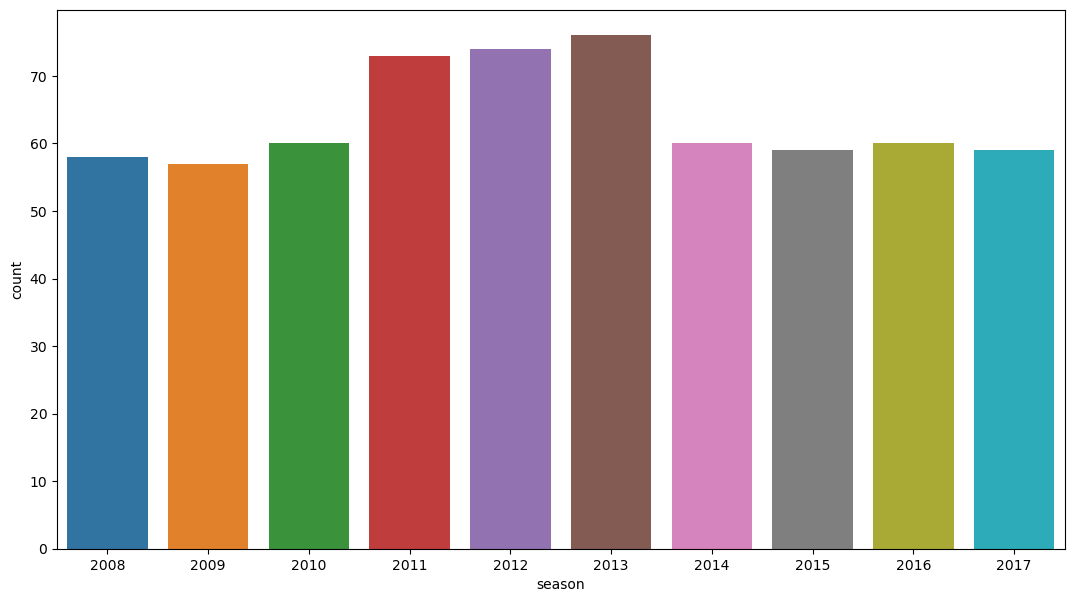

In [42]:
plt.figure(figsize=(13,7))
sns.countplot(x='season',data=matches_df)
plt.show()

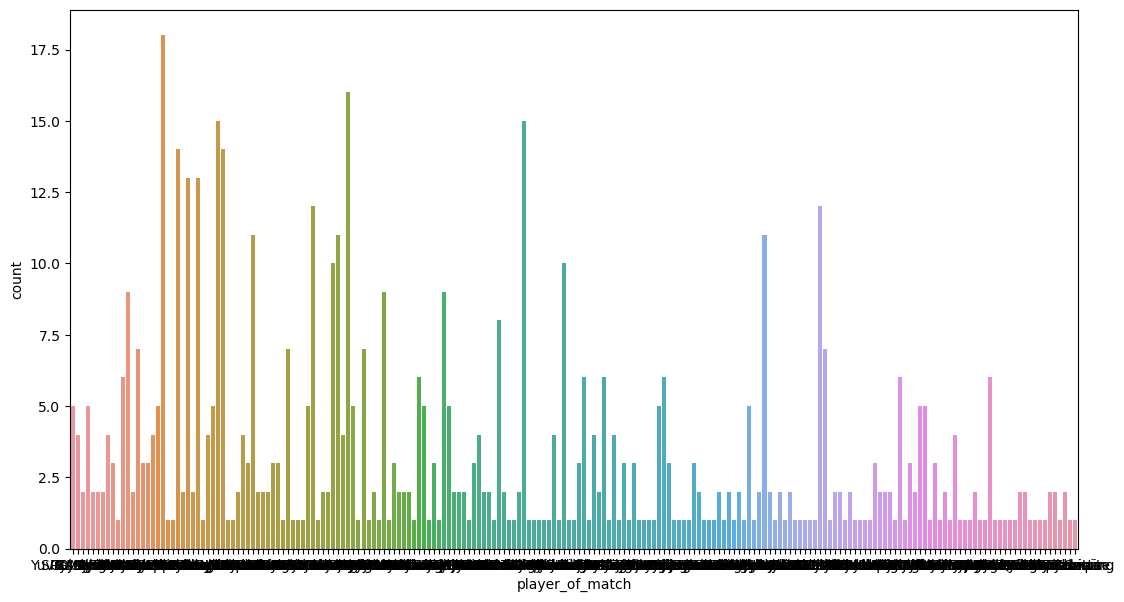

In [43]:
plt.figure(figsize=(13,7))
sns.countplot(x='player_of_match',data=matches_df)
plt.show()

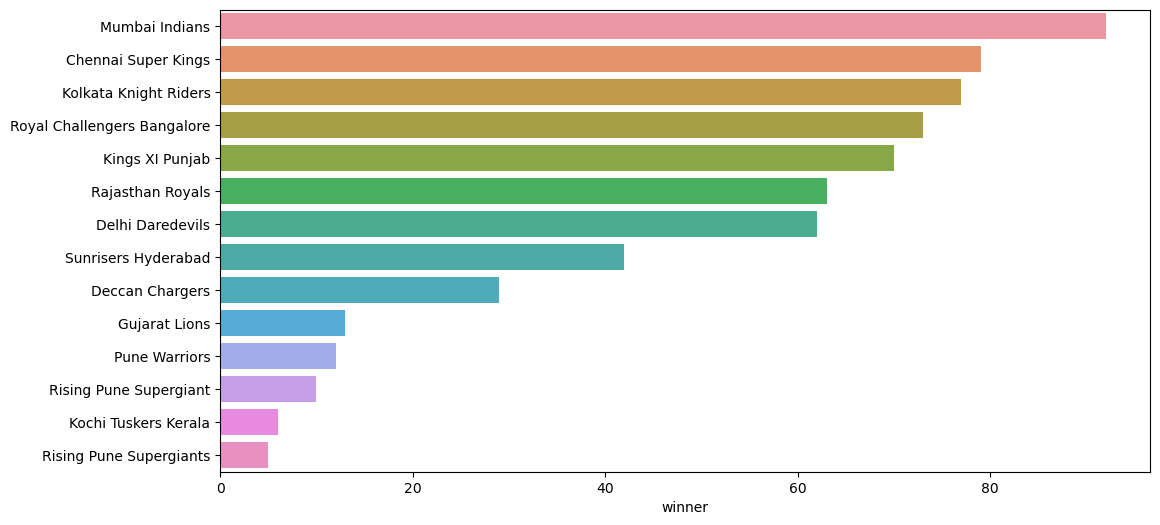

In [44]:
plt.figure(figsize=(12,6))
data=matches_df.winner.value_counts()
sns.barplot(y=data.index, x=data,orient='h')
plt.show()

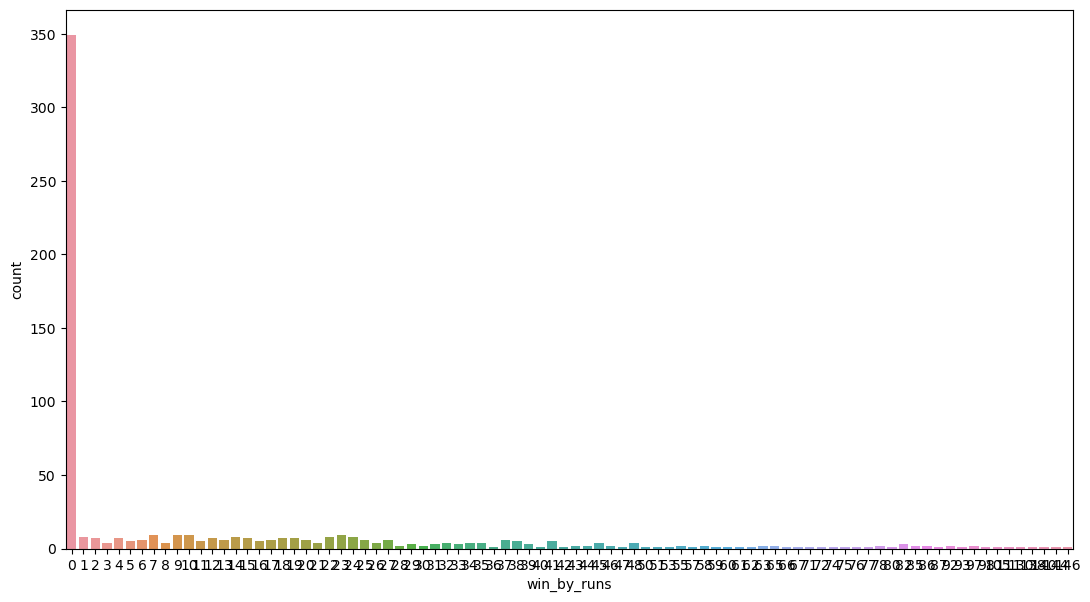

In [45]:
plt.figure(figsize=(13,7))
sns.countplot(x='win_by_runs',data=matches_df)
plt.show()

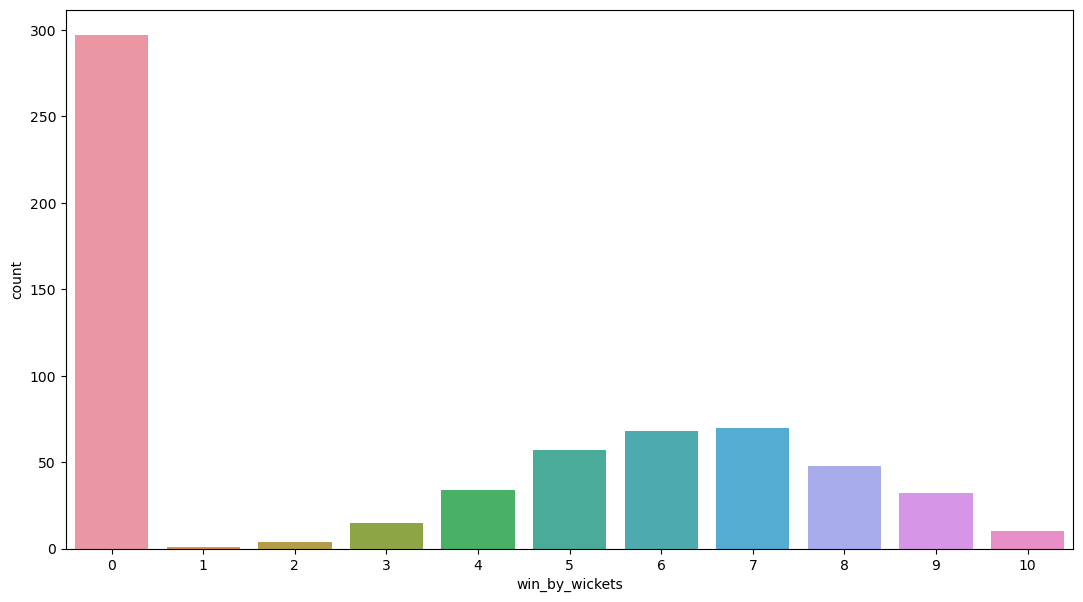

In [46]:
plt.figure(figsize=(13,7))
sns.countplot(x='win_by_wickets',data=matches_df)
plt.show()

# TOP PLAYER OF THE MATCH WINNERS

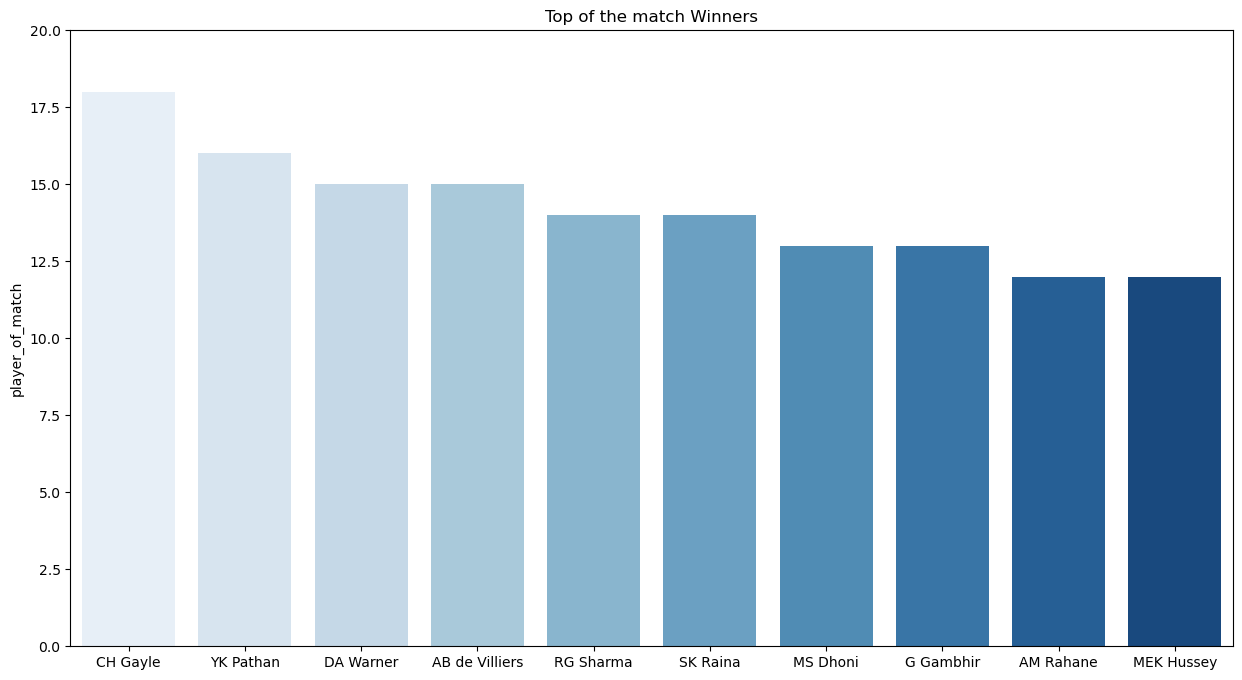

In [47]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players, orient ='v',
           palette = "Blues");
plt.show()

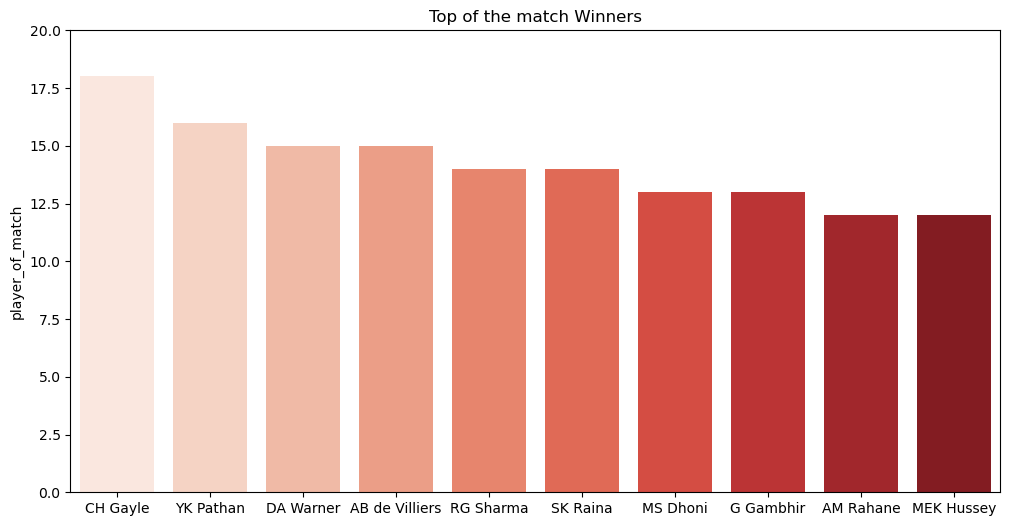

In [48]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players, orient ='v',
           palette = "Reds");
plt.show()

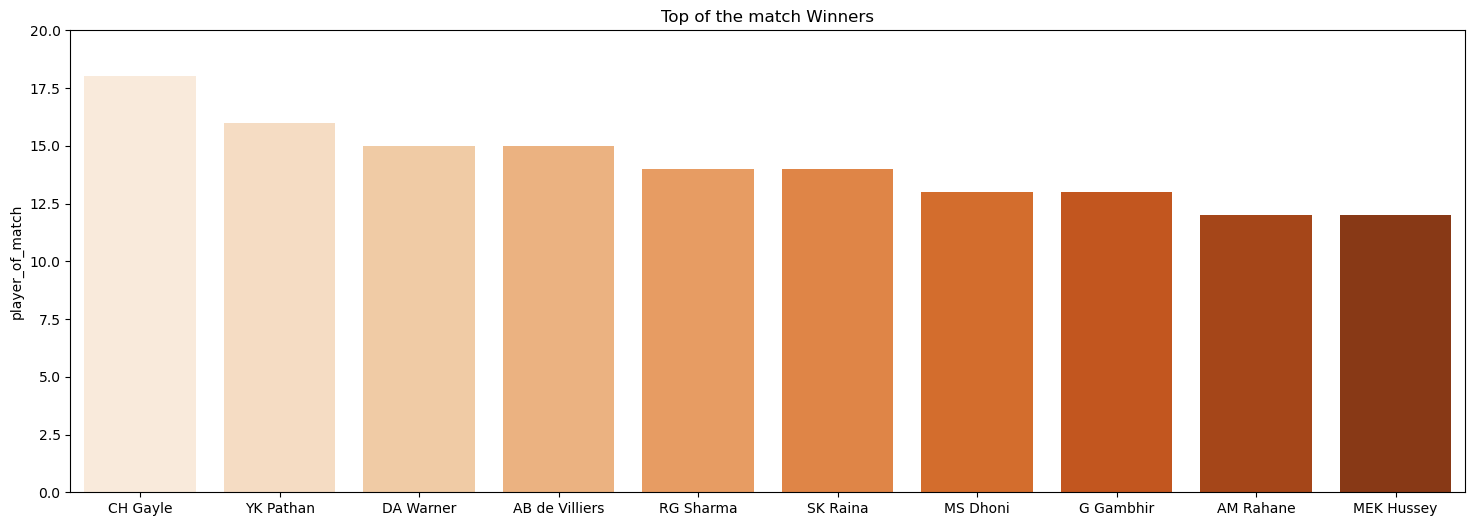

In [49]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(18,6))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players, orient ='v',
           palette = "Oranges");
plt.show()

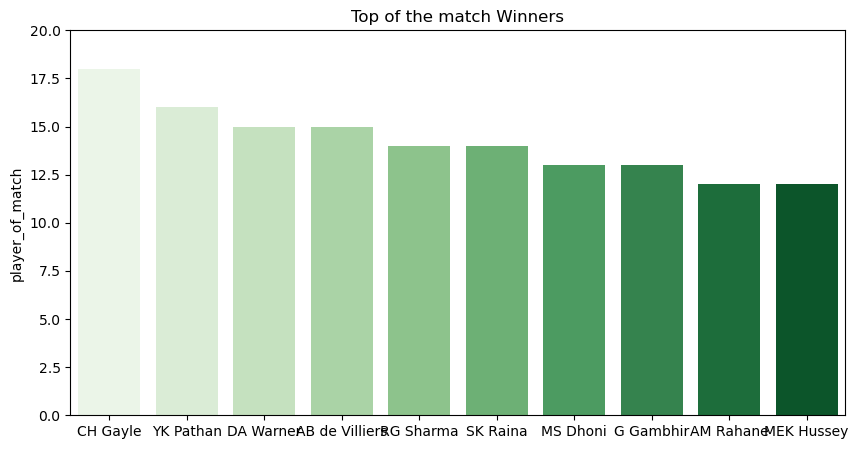

In [50]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players, orient ='v',
           palette = "Greens");
plt.show()

/tmp/ipykernel_32/2802560033.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=top_players.index, y = top_players,


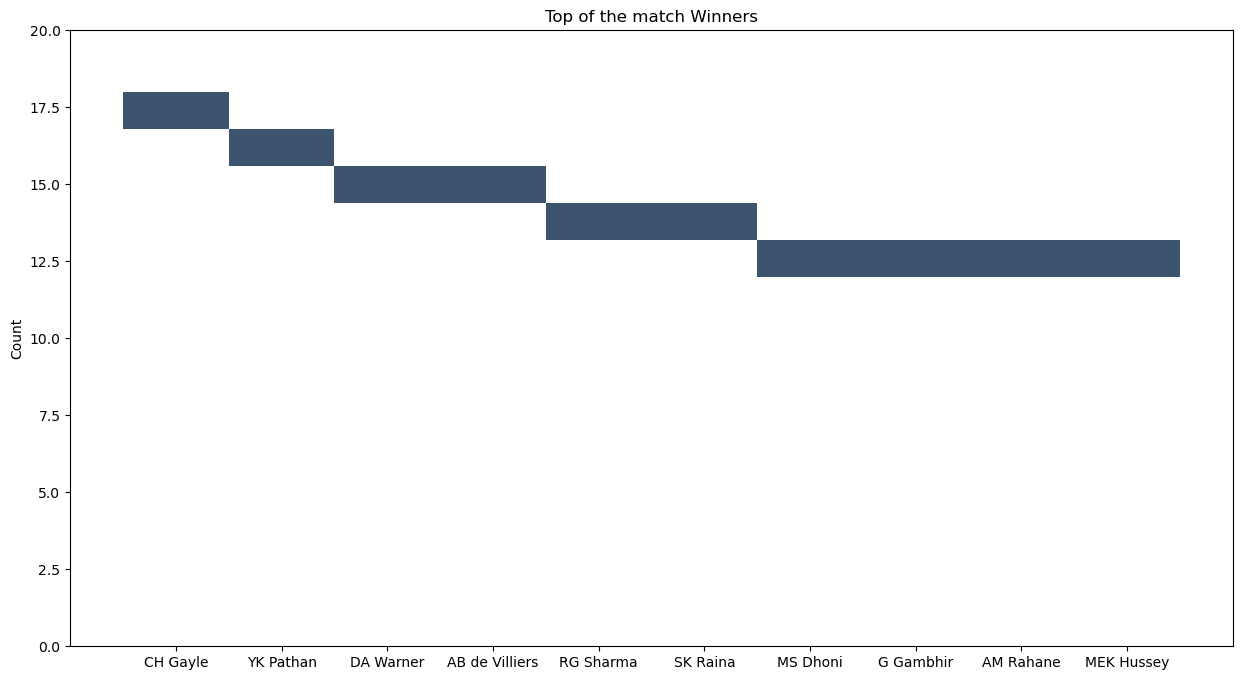

In [51]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.histplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.histplot(x=top_players.index, y = top_players,
           palette = "Blues");
plt.show()

/tmp/ipykernel_32/4183849436.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=top_players.index, y = top_players,


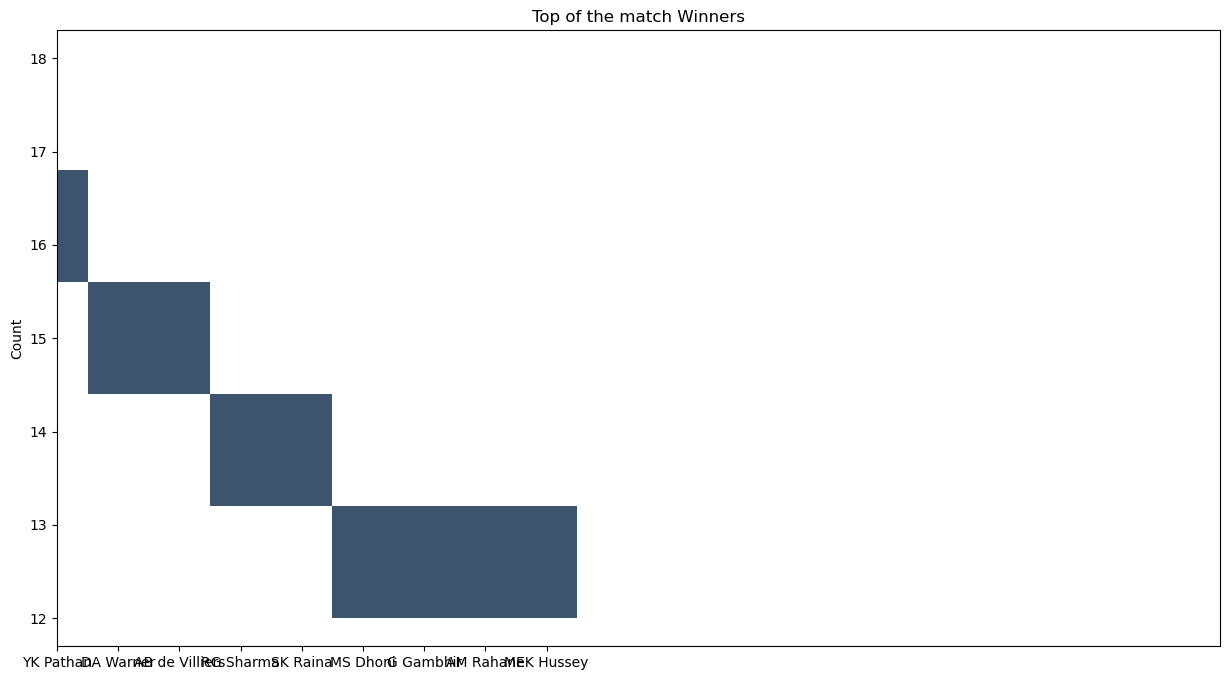

In [52]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.histplot(x="day",y="total_bill",,data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlim([1,20])
ax.set_ylabel("Count")
ax.set_title("Top of the match Winners")
#top_players.plot.bar()
sns.histplot(x=top_players.index, y = top_players,
           palette = "Blues");
plt.show()

# NUMBER OF MATCHES IN VENUES

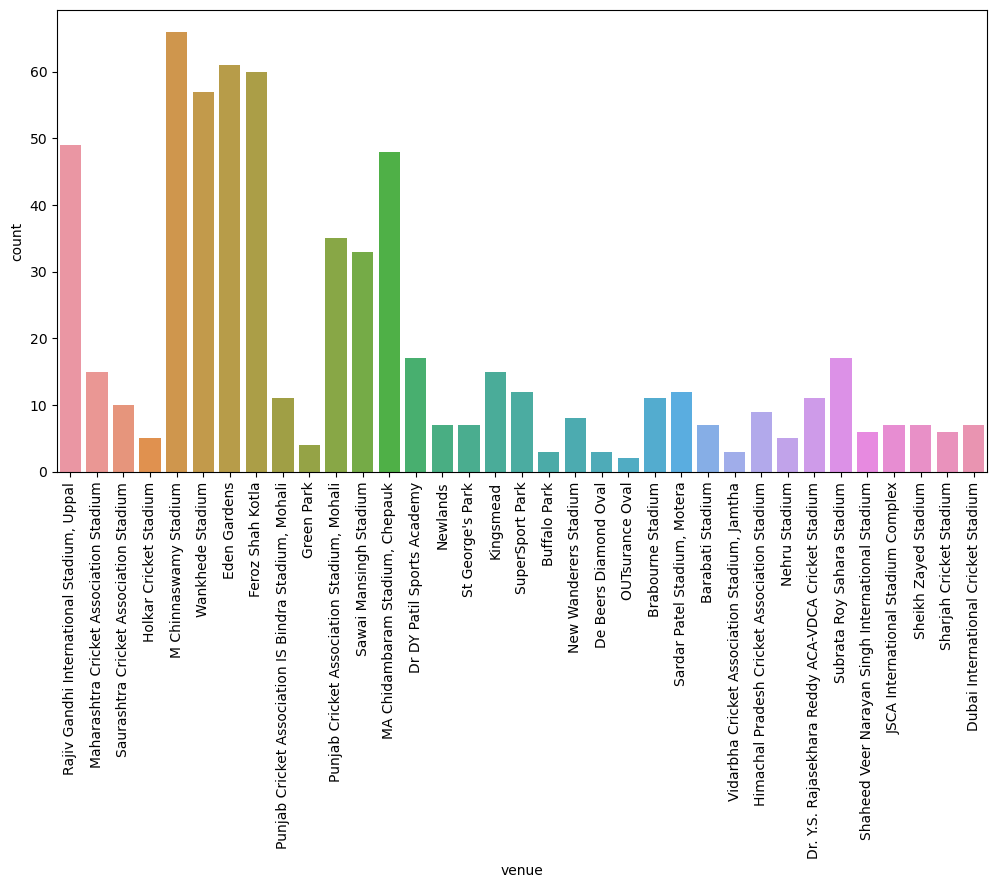

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue',data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

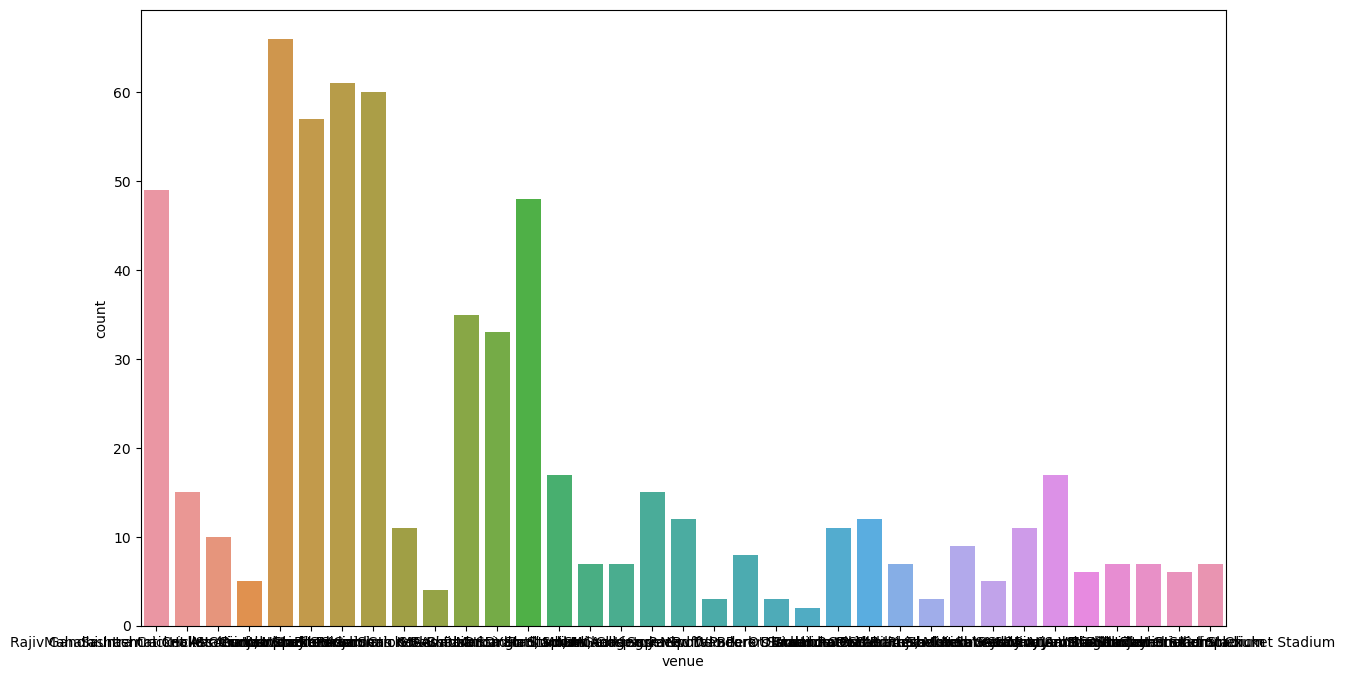

In [54]:
plt.figure(figsize=(14,8))
sns.countplot(x='venue',data=matches_df)
plt.xticks(rotation='horizontal')
plt.show()

# NUMBER OF MATCHES PLAYED BY EACH TEAM:

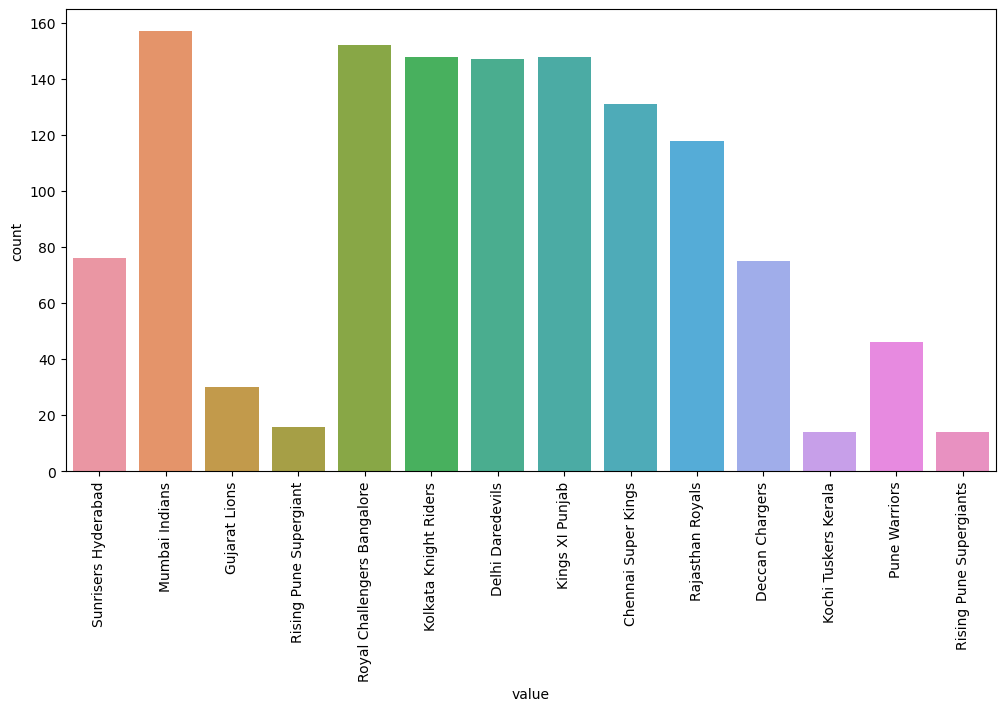

In [55]:
temp_df=pd.melt(matches_df,id_vars=['id','season'],
               value_vars=['team1','team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value',data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

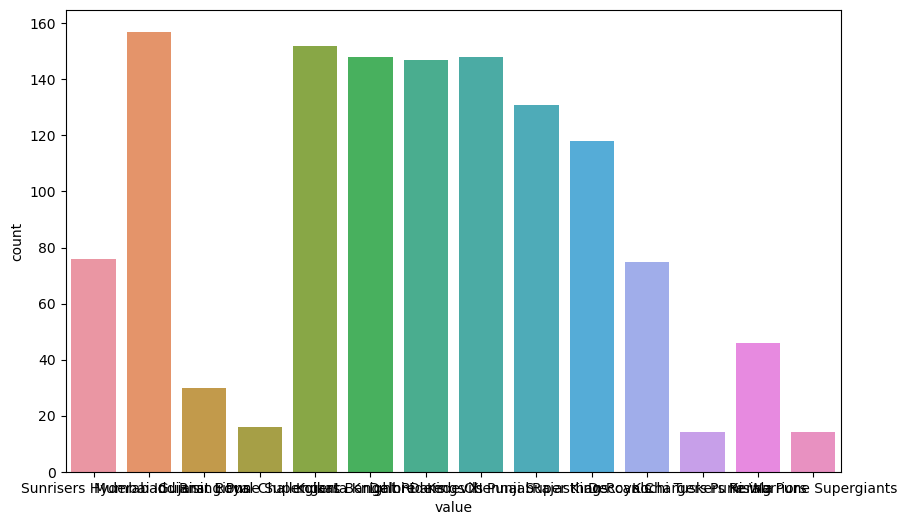

In [56]:
temp_df=pd.melt(matches_df,id_vars=['id','season'],
               value_vars=['team1','team2'])
plt.figure(figsize=(10,6))
sns.countplot(x='value',data=temp_df)
plt.xticks(rotation='horizontal')
plt.show()

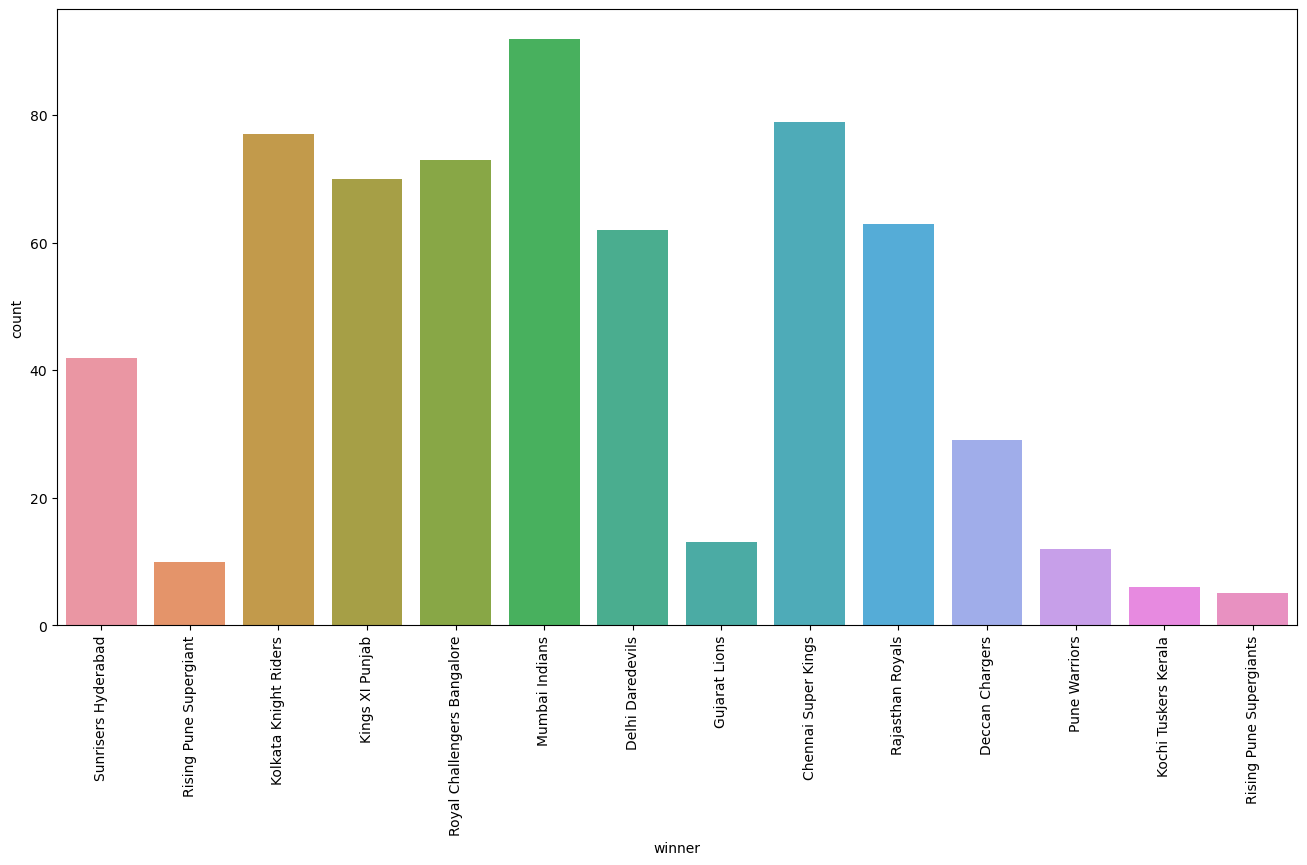

In [57]:
plt.figure(figsize=(16,8))
sns.countplot(x='winner',data=matches_df)
plt.xticks(rotation=90)
plt.show()

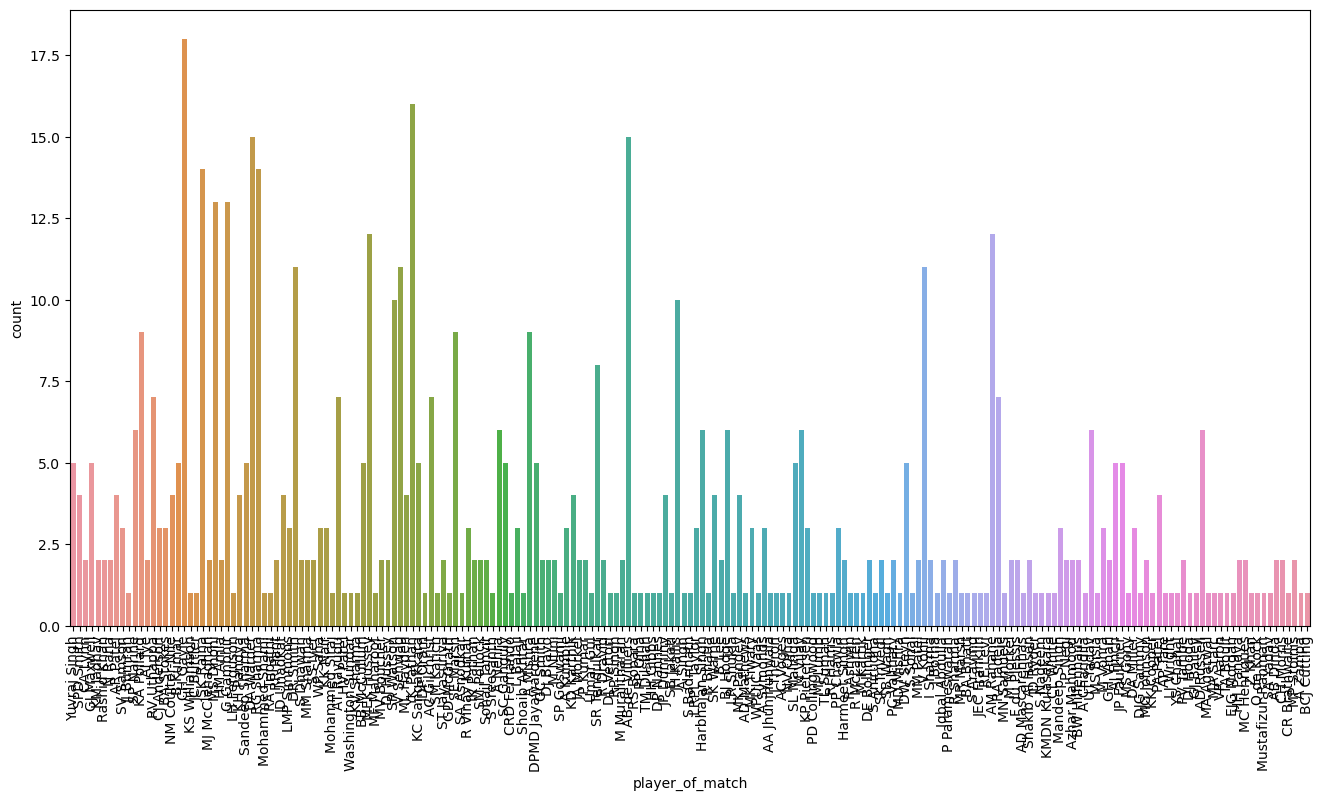

In [58]:
plt.figure(figsize=(16,8))
sns.countplot(x='player_of_match',data=matches_df)
plt.xticks(rotation=90)
plt.show()

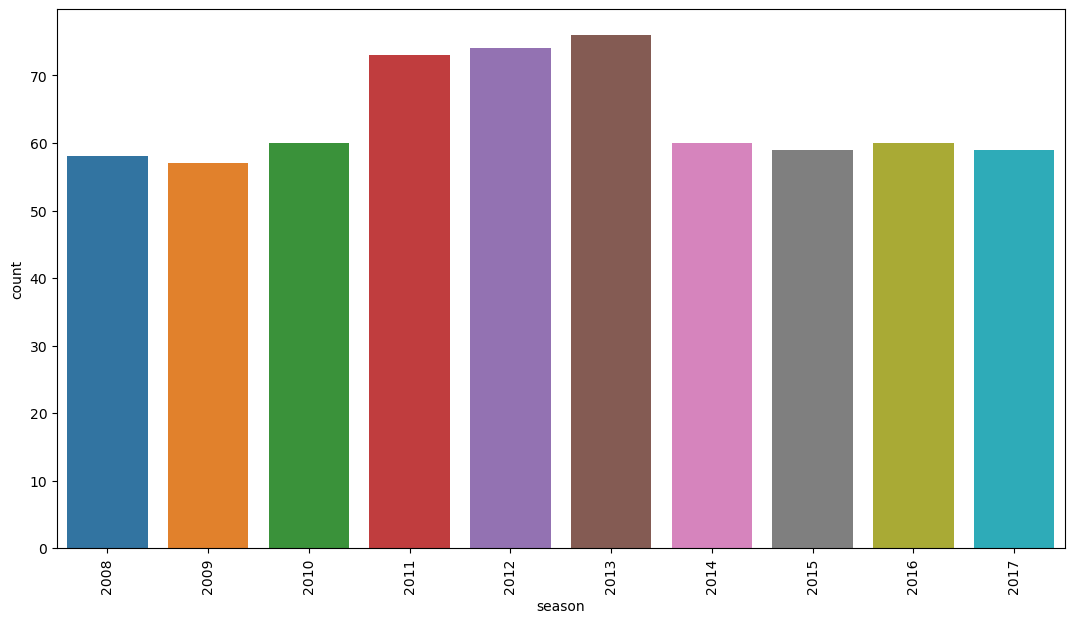

In [59]:
plt.figure(figsize=(13,7))
sns.countplot(x='season',data=matches_df)
plt.xticks(rotation=90)
plt.show()

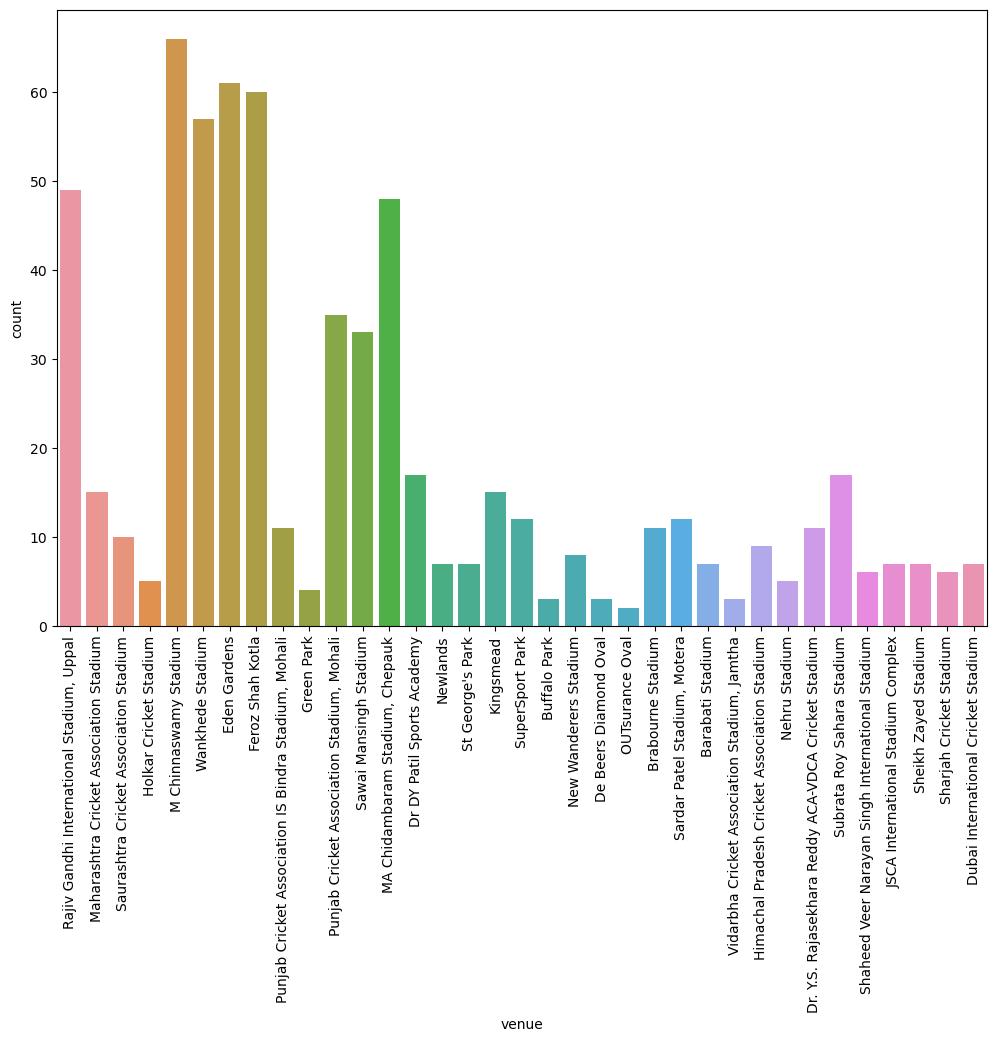

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(x='venue',data=matches_df)
plt.xticks(rotation=90)
plt.show()

In [61]:
df_2012 = sgps.get_group(2012)
df_2012

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
308,309,2012,Kolkata,2012-04-05,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN
309,310,2012,Mumbai,2012-04-06,Pune Warriors,Mumbai Indians,Mumbai Indians,field,normal,0,Pune Warriors,28,0,SPD Smith,Wankhede Stadium,AK Chaudhary,SJA Taufel,NaN
310,311,2012,Jaipur,2012-04-06,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AM Rahane,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
311,312,2012,Bangalore,2012-04-07,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Royal Challengers Bangalore,20,0,AB de Villiers,M Chinnaswamy Stadium,S Asnani,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
377,378,2012,Pune,2012-05-22,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,18,0,YK Pathan,Subrata Roy Sahara Stadium,BR Doctrove,SJA Taufel,NaN
378,379,2012,Bangalore,2012-05-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,38,0,MS Dhoni,M Chinnaswamy Stadium,BF Bowden,HDPK Dharmasena,NaN
379,380,2012,Chennai,2012-05-25,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,86,0,M Vijay,"MA Chidambaram Stadium, Chepauk",BR Doctrove,SJA Taufel,NaN


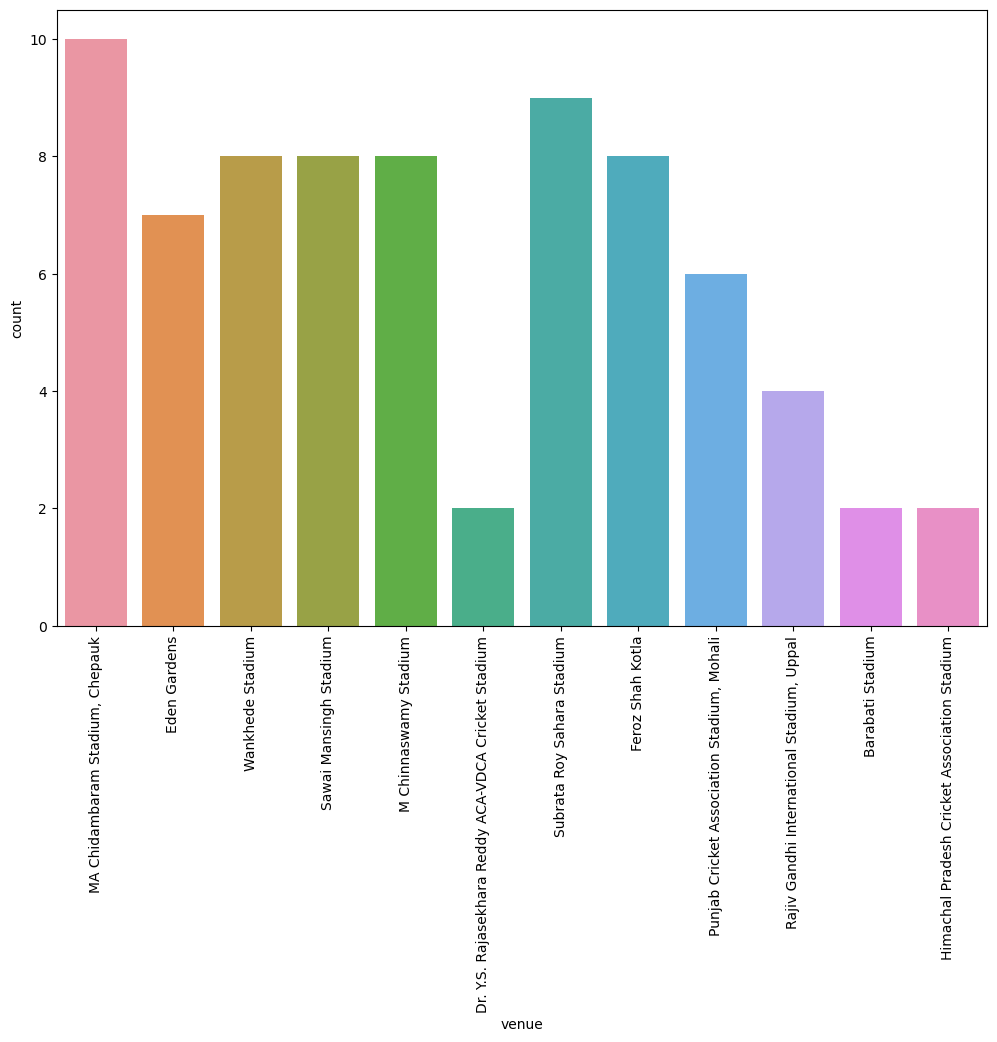

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(x='venue',data=df_2012)
plt.xticks(rotation=90)
plt.show()

In [63]:
df_2013 = sgps.get_group(2013)
df_2013

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel,NaN
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin,NaN
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel,NaN
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin,NaN
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker,NaN
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel,NaN


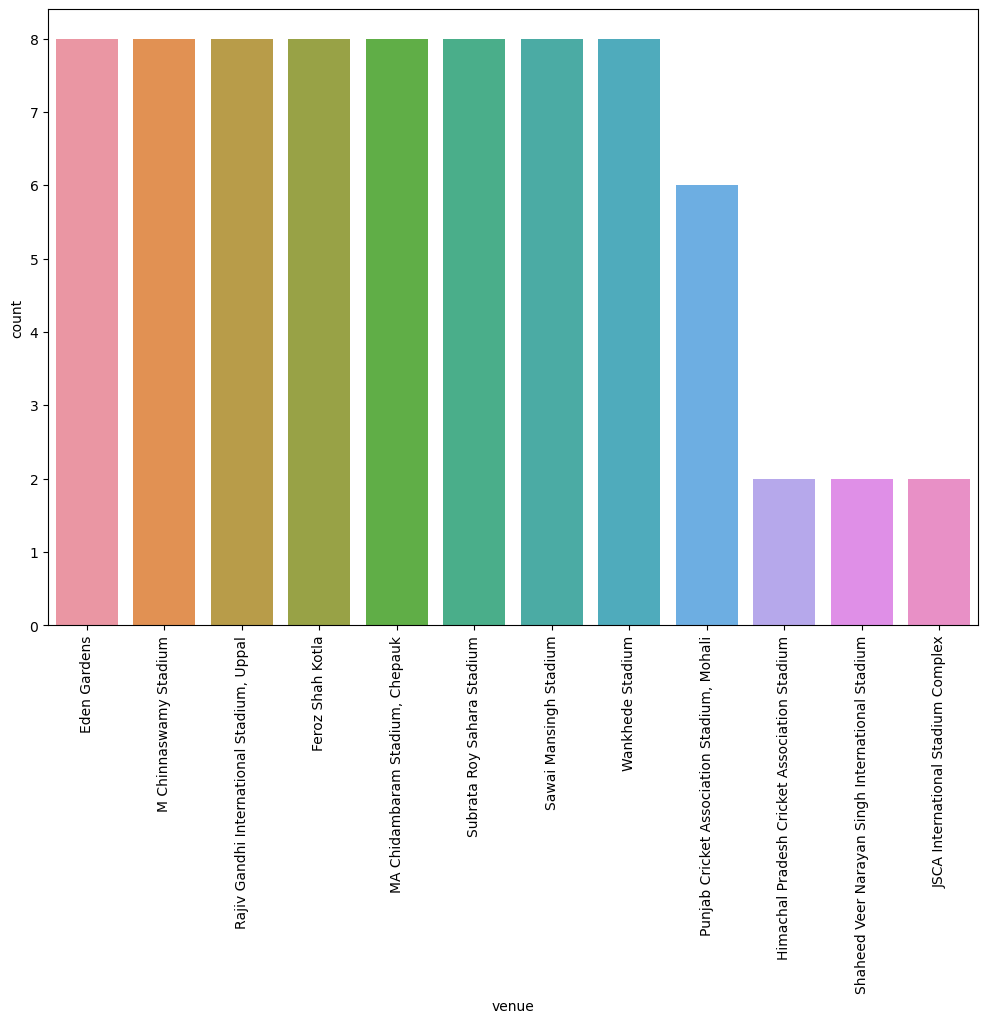

In [64]:
plt.figure(figsize=(12,8))
sns.countplot(x='venue',data=df_2013)
plt.xticks(rotation=90)
plt.show()

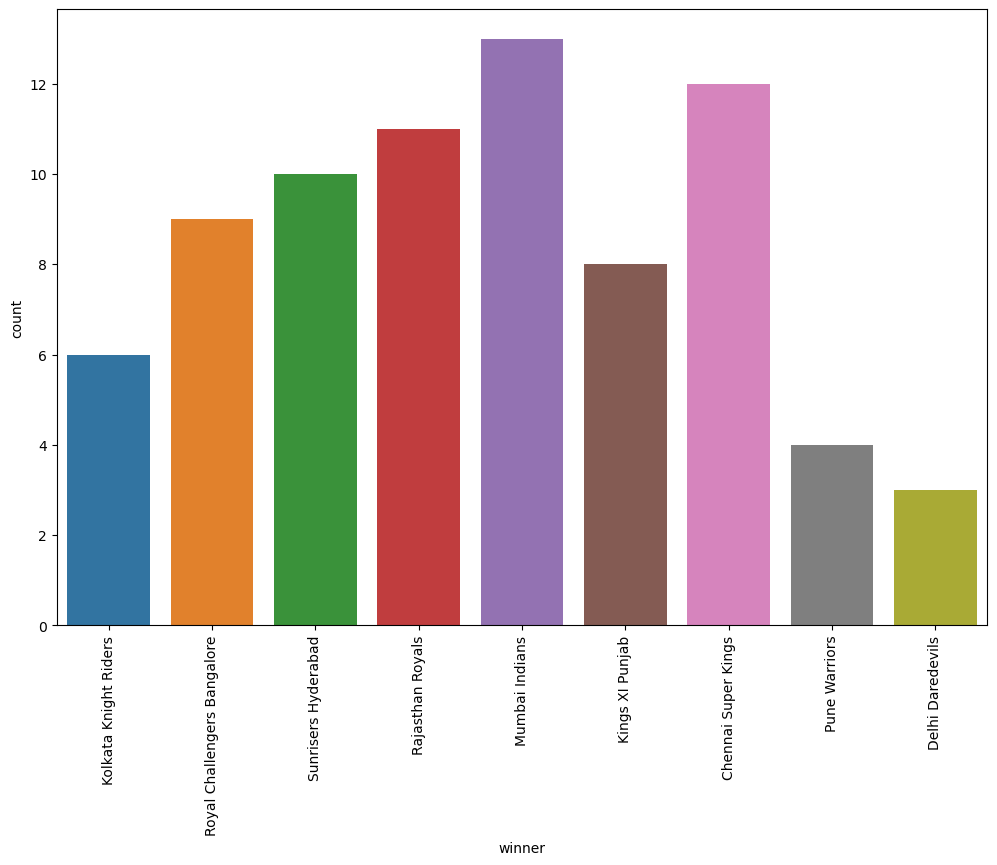

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df_2013)
plt.xticks(rotation=90)
plt.show()

In [66]:
df_2012 = sgps.get_group(2012)
df_2012

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
308,309,2012,Kolkata,2012-04-05,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN
309,310,2012,Mumbai,2012-04-06,Pune Warriors,Mumbai Indians,Mumbai Indians,field,normal,0,Pune Warriors,28,0,SPD Smith,Wankhede Stadium,AK Chaudhary,SJA Taufel,NaN
310,311,2012,Jaipur,2012-04-06,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AM Rahane,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
311,312,2012,Bangalore,2012-04-07,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Royal Challengers Bangalore,20,0,AB de Villiers,M Chinnaswamy Stadium,S Asnani,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
377,378,2012,Pune,2012-05-22,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,18,0,YK Pathan,Subrata Roy Sahara Stadium,BR Doctrove,SJA Taufel,NaN
378,379,2012,Bangalore,2012-05-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,38,0,MS Dhoni,M Chinnaswamy Stadium,BF Bowden,HDPK Dharmasena,NaN
379,380,2012,Chennai,2012-05-25,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,86,0,M Vijay,"MA Chidambaram Stadium, Chepauk",BR Doctrove,SJA Taufel,NaN


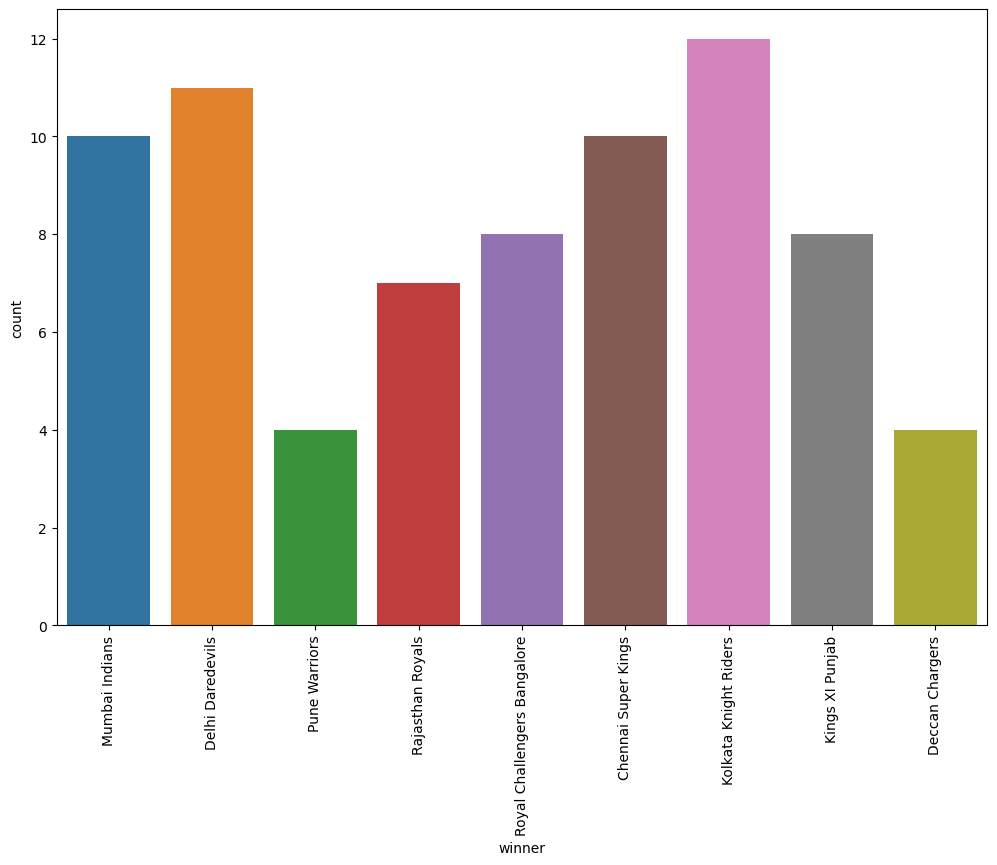

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df_2012)
plt.xticks(rotation=90)
plt.show()

In [68]:
sgps = matches_df.groupby('venue')

In [69]:
sgps.groups

{'Barabati Stadium': [185, 188, 336, 347, 485, 490, 496], 'Brabourne Stadium': [175, 187, 190, 193, 200, 206, 220, 514, 552, 557, 569], 'Buffalo Park': [137, 143, 149], 'De Beers Diamond Oval': [150, 151, 154], 'Dr DY Patil Sports Academy': [71, 81, 85, 116, 174, 198, 230, 231, 232, 233, 238, 243, 249, 263, 276, 294, 297], 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': [312, 315, 528, 530, 536, 612, 615, 618, 622, 624, 628], 'Dubai International Cricket Stadium': [461, 462, 466, 468, 469, 474, 476], 'Eden Gardens': [10, 13, 22, 26, 30, 39, 52, 63, 74, 87, 94, 102, 104, 111, 177, 181, 203, 207, 212, 226, 229, 239, 250, 254, 257, 269, 280, 302, 308, 321, 324, 343, 352, 362, 367, 381, 396, 405, 412, 414, 426, 455, 456, 503, 505, 510, 513, 517, 521, 526, 544, 554, 559, 575, 577, 580, 607, 613, 620, 623, 630], 'Feroz Shah Kotla': [14, 17, 38, 40, 43, 50, 54, 61, 75, 86, 97, 99, 108, 182, 184, 199, 202, 208, 217, 228, 237, 252, 258, 262, 265, 273, 300, 317, 322, 334, 341, 344, 356, 3

In [70]:
df_venue_bng = sgps.get_group('M Chinnaswamy Stadium')
df_venue_bng  

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,617,2016,Bangalore,2016-05-11,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KH Pandya,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
625,626,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN


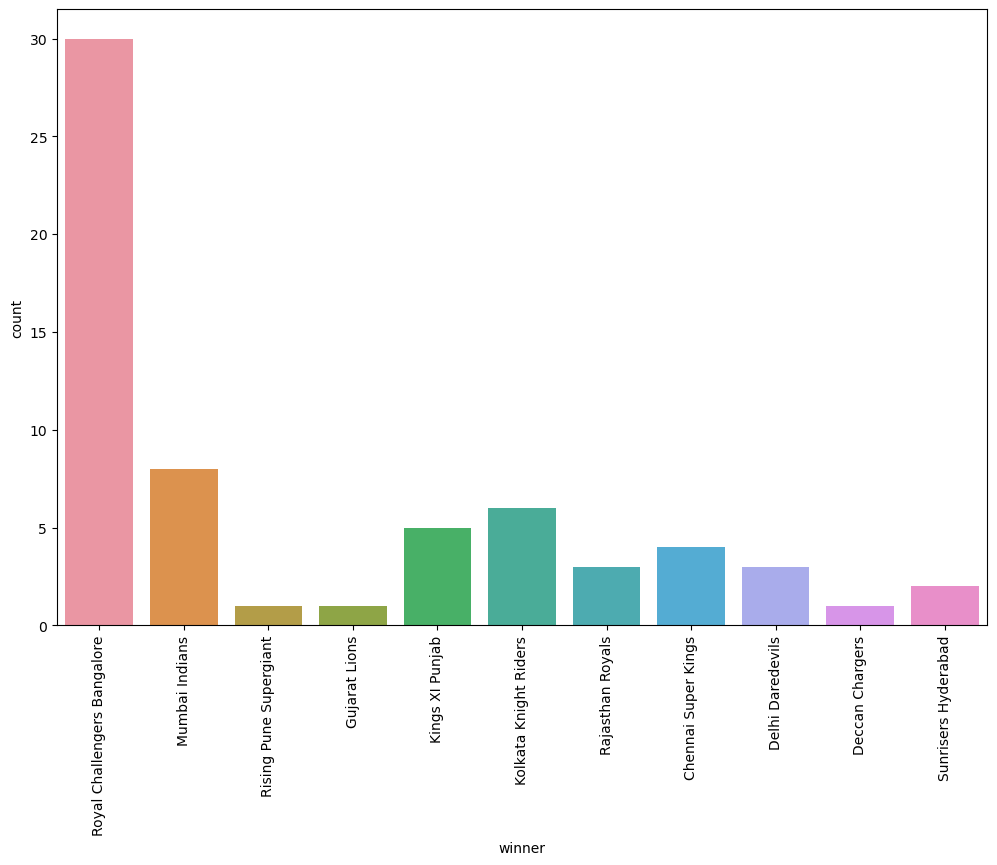

In [71]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df_venue_bng)
plt.xticks(rotation=90)
plt.show()

In [72]:
df_venue_MI = sgps.get_group('Wankhede Stadium')
df_venue_MI  

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
27,28,2017,Mumbai,2017-04-24,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
36,37,2017,Mumbai,2017-05-01,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Wankhede Stadium,AK Chaudhary,CB Gaffaney,NaN
49,50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore,NaN
55,56,2017,Mumbai,2017-05-16,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,20,0,Washington Sundar,Wankhede Stadium,S Ravi,C Shamshuddin,NaN
62,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN


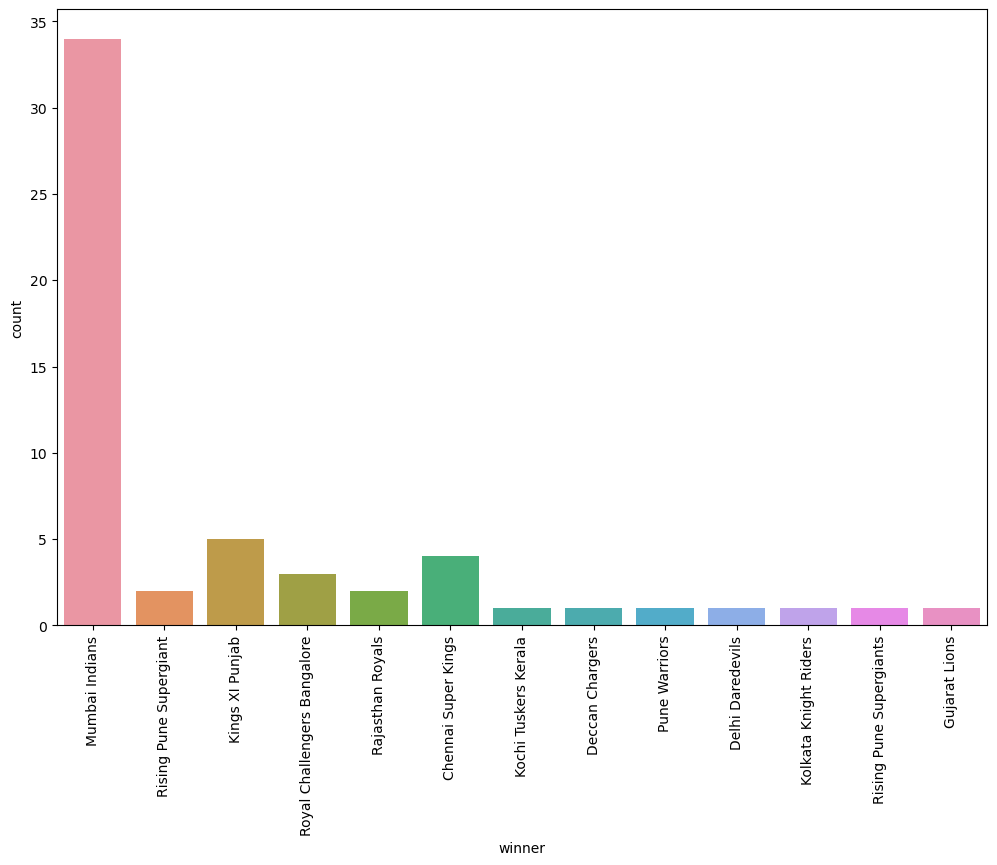

In [73]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df_venue_MI)
plt.xticks(rotation=90)
plt.show()

In [74]:
temp_df = matches_df.drop_duplicates(subset=['season'], keep='last')
temp_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [75]:
temp_df = matches_df.drop_duplicates(subset=['winner'], keep='last')
temp_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
55,56,2017,Mumbai,2017-05-16,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,20,0,Washington Sundar,Wankhede Stadium,S Ravi,C Shamshuddin,NaN
293,294,2011,Indore,2011-05-15,Rajasthan Royals,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,normal,0,Kochi Tuskers Kerala,0,8,BJ Hodge,Holkar Cricket Stadium,PR Reiffel,RJ Tucker,NaN
375,376,2012,Hyderabad,2012-05-20,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,9,0,DW Steyn,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel,NaN
450,451,2013,Pune,2013-05-19,Pune Warriors,Delhi Daredevils,Pune Warriors,bat,normal,0,Pune Warriors,38,0,LJ Wright,Subrata Roy Sahara Stadium,NJ Llong,SJA Taufel,NaN
569,570,2015,Mumbai,2015-05-16,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,9,0,SR Watson,Brabourne Stadium,RM Deshpande,RK Illingworth,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
574,575,2015,Ranchi,2015-05-22,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,3,A Nehra,JSCA International Stadium Complex,AK Chaudhary,CB Gaffaney,NaN
618,619,2016,Visakhapatnam,2016-05-13,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,7,MP Stoinis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,CK Nandan,NaN
622,623,2016,Visakhapatnam,2016-05-15,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,80,0,KH Pandya,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,CK Nandan,NaN
627,628,2016,Raipur,2016-05-20,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,KK Nair,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN


In [76]:
temp_df = matches_df.drop_duplicates(subset=['id'], keep='last')
temp_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [77]:
temp_df = matches_df.drop_duplicates(subset=['season','winner'], keep='last')
temp_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
45,46,2017,Chandigarh,2017-05-07,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,VK Sharma,NaN
49,50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore,NaN
50,51,2017,Delhi,2017-05-12,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,bat,normal,0,Delhi Daredevils,7,0,KK Nair,Feroz Shah Kotla,KN Ananthapadmanabhan,CK Nandan,NaN
51,52,2017,Kanpur,2017-05-13,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,Mohammed Siraj,Green Park,AK Chaudhary,Nitin Menon,NaN
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,629,2016,Visakhapatnam,2016-05-21,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
629,630,2016,Kanpur,2016-05-21,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
630,631,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN


In [78]:
temp_df = matches_df.drop_duplicates(subset=['venue'], keep='last')
temp_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
129,130,2009,Cape Town,2009-04-26,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Kings XI Punjab,27,0,KC Sangakkara,Newlands,M Erasmus,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Delhi Daredevils,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN
154,155,2009,Kimberley,2009-05-11,Deccan Chargers,Rajasthan Royals,Deccan Chargers,bat,normal,0,Deccan Chargers,53,0,DR Smith,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
168,169,2009,Durban,2009-05-20,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,M Muralitharan,Kingsmead,BG Jerling,SJA Taufel,NaN
171,172,2009,Centurion,2009-05-22,Delhi Daredevils,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,6,AC Gilchrist,SuperSport Park,BR Doctrove,DJ Harper,NaN
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
219,220,2010,Nagpur,2010-04-12,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,13,0,Harmeet Singh,"Vidarbha Cricket Association Stadium, Jamtha",RE Koertzen,RB Tiffin,NaN
277,278,2011,Kochi,2011-05-05,Kochi Tuskers Kerala,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kochi Tuskers Kerala,17,0,BJ Hodge,Nehru Stadium,S Ravi,RJ Tucker,NaN


In [79]:
temp_df = matches_df.drop_duplicates(subset=['season'],keep='last')
temp_df.iloc[:,[1,10]]

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


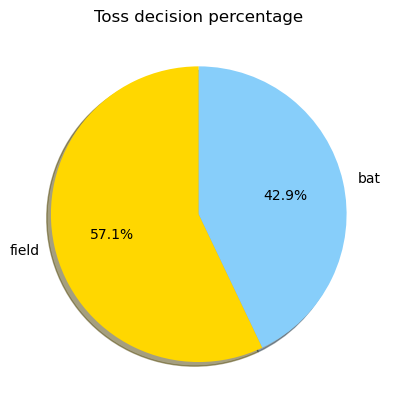

In [80]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [81]:
sgps = matches_df.groupby('team1')

In [82]:
sgps.groups

{'Chennai Super Kings': [60, 66, 73, 78, 82, 84, 90, 95, 116, 121, 130, 136, 140, 143, 148, 158, 165, 168, 172, 181, 193, 205, 210, 215, 223, 231, 233, 234, 242, 247, 251, 261, 271, 280, 284, 288, 296, 301, 306, 307, 312, 317, 323, 331, 346, 351, 354, 370, 378, 379, 380, 403, 417, 421, 424, 434, 441, 445, 453, 459, 464, 466, 477, 498, 503, 506, 518, 520, 526, 532, 537, 541, 546, 553, 558, 562, 564], 'Deccan Chargers': [63, 65, 67, 76, 79, 88, 107, 113, 123, 127, 135, 139, 146, 150, 154, 173, 178, 185, 188, 194, 219, 228, 232, 235, 244, 248, 252, 264, 278, 285, 291, 299, 315, 322, 327, 330, 336, 340, 345, 347, 355, 365, 375], 'Delhi Daredevils': [8, 14, 17, 30, 34, 50, 72, 75, 86, 92, 97, 99, 124, 132, 157, 160, 164, 166, 171, 184, 196, 199, 202, 208, 217, 237, 240, 258, 262, 268, 273, 300, 341, 344, 356, 363, 381, 393, 400, 418, 427, 432, 442, 458, 479, 482, 484, 488, 501, 511, 522, 530, 534, 538, 542, 555, 570, 577, 592, 601, 608, 624, 631], 'Gujarat Lions': [2, 5, 15, 33, 37, 40, 48,

In [83]:
df_team1_bng = sgps.get_group('Royal Challengers Bangalore')
df_team1_bng  

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
19,20,2017,Rajkot,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma,NaN
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,2016,Bangalore,2016-05-02,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M Chinnaswamy Stadium,M Erasmus,S Ravi,NaN
614,615,2016,Chandigarh,2016-05-09,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN
616,617,2016,Bangalore,2016-05-11,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KH Pandya,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN


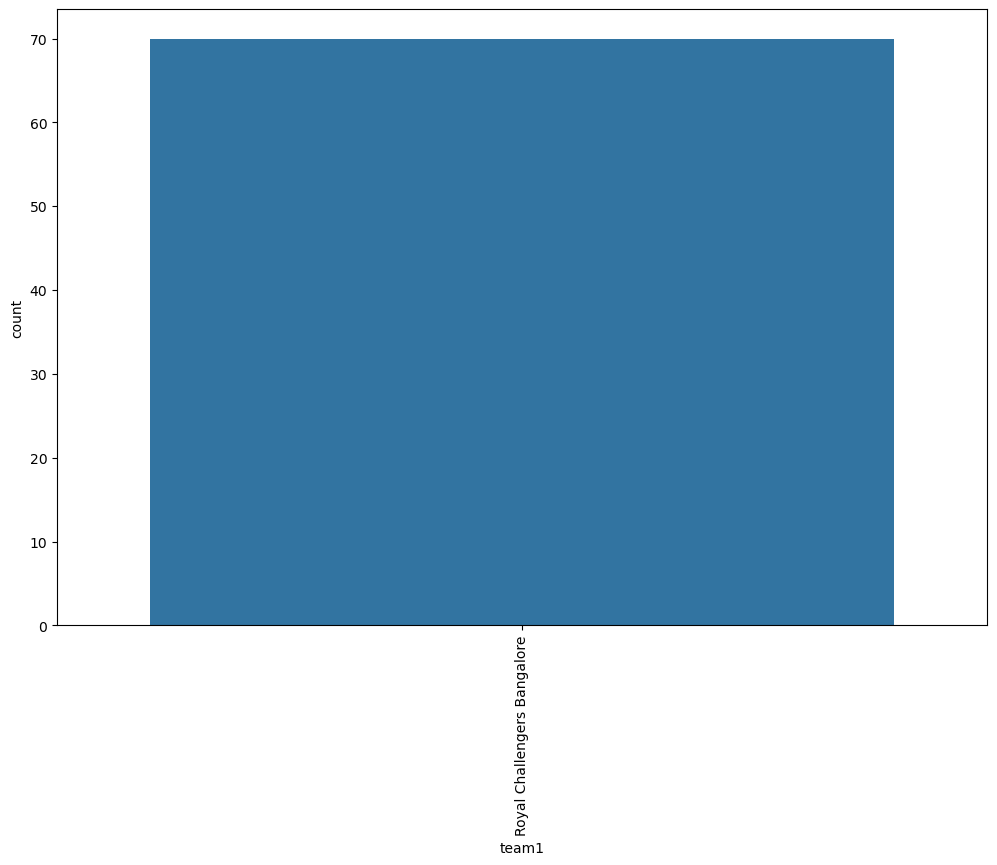

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(x='team1',data=df_team1_bng)
plt.xticks(rotation=90)
plt.show()

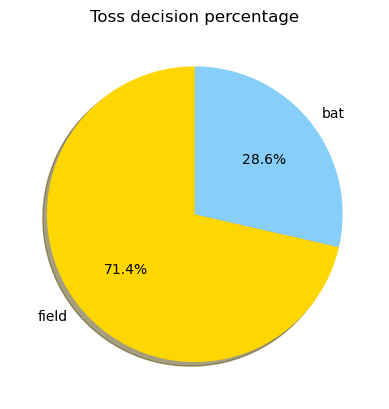

In [85]:
temp_series = df_team1_bng.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [86]:
df_team1_csk = sgps.get_group('Chennai Super Kings')
df_team1_csk 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,2015,Chennai,2015-04-28,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Chennai Super Kings,2,0,DJ Bravo,"MA Chidambaram Stadium, Chepauk",RM Deshpande,VA Kulkarni,NaN
553,554,2015,Chennai,2015-05-04,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",C Shamshuddin,K Srinath,NaN
558,559,2015,Chennai,2015-05-08,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,HH Pandya,"MA Chidambaram Stadium, Chepauk",CB Gaffaney,CK Nandan,NaN
562,563,2015,Chennai,2015-05-10,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,12,0,RA Jadeja,"MA Chidambaram Stadium, Chepauk",M Erasmus,CK Nandan,NaN


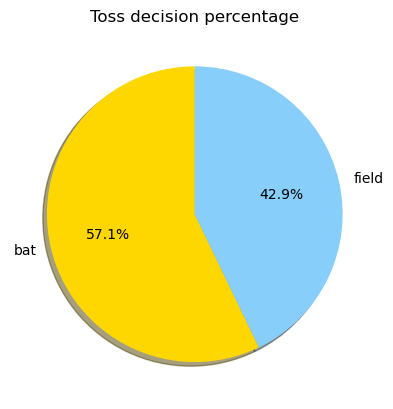

In [87]:
temp_series = df_team1_csk.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [88]:
df_team1_MI = sgps.get_group('Mumbai Indians')
df_team1_MI 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
46,47,2017,Hyderabad,2017-05-08,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus,NaN
52,53,2017,Kolkata,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,588,2016,Hyderabad,2016-04-18,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,7,DA Warner,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,VK Sharma,NaN
596,597,2016,Chandigarh,2016-04-25,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,25,0,PA Patel,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,RJ Tucker,NaN
618,619,2016,Visakhapatnam,2016-05-13,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,7,MP Stoinis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,CK Nandan,NaN
622,623,2016,Visakhapatnam,2016-05-15,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,80,0,KH Pandya,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,CK Nandan,NaN


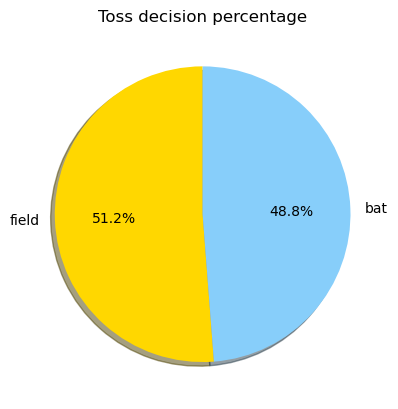

In [89]:
temp_series = df_team1_MI.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

# Score DataSet

In [90]:
score_df = pd.read_csv("/kaggle/input/ipl/deliveries.csv")
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# BATSMAN ANALYSIS:

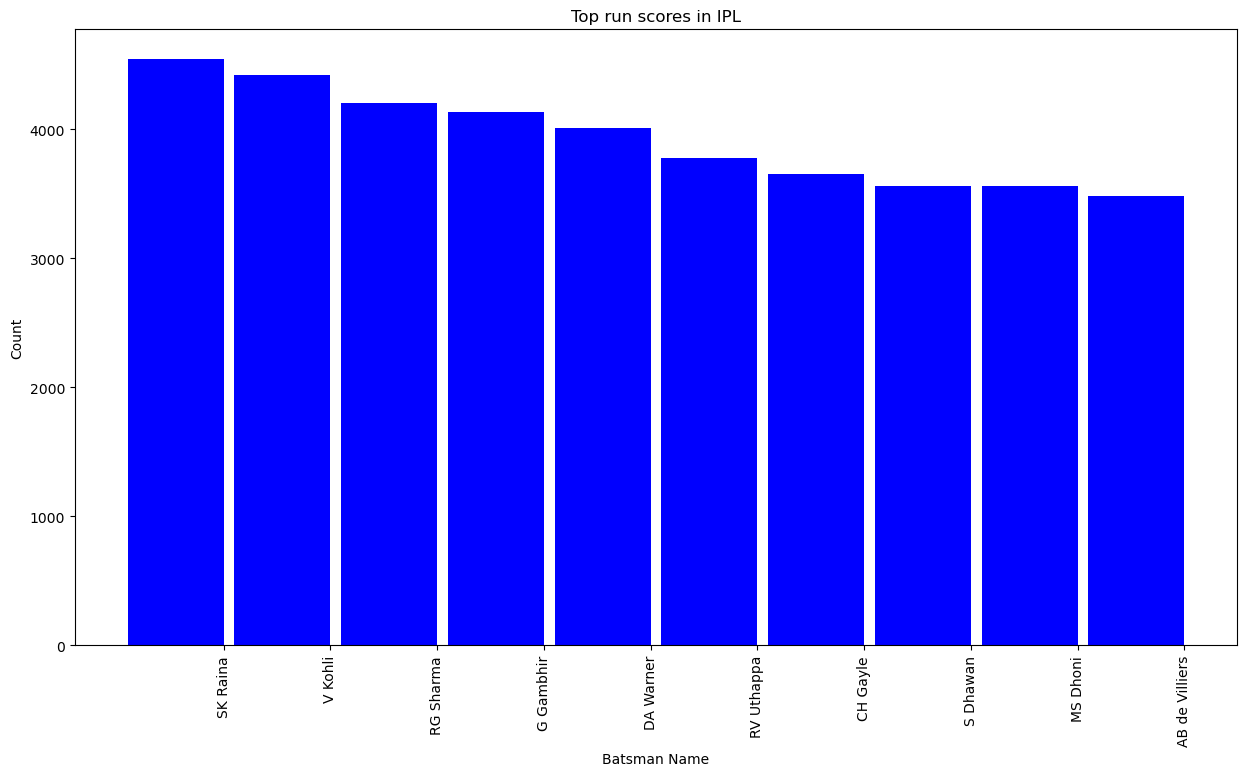

In [91]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']),width=width,
              color = 'blue')
ax.set_xticks(ind+(width)/2.)
ax.set_xticklabels(labels, rotation ='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scores in IPL")
ax.set_xlabel('Batsman Name')
#autolabel(rects)
plt.show()